In [1]:
# ─── STEP 1: Load Real Medical Dataset ──────────────────────────
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (accuracy_score, classification_report,
                              confusion_matrix, roc_auc_score)
 
# Load Wisconsin Breast Cancer Dataset (REAL biomedical data)
cancer = load_breast_cancer()
X = pd.DataFrame(cancer.data, columns=cancer.feature_names)
y = cancer.target  # 0 = malignant, 1 = benign
 


In [2]:
cancer 

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [3]:
cancer_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
cancer_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [4]:
X.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')

In [5]:
pd.DataFrame(y)

,0
0,0
1,0
2,0
3,0
4,0
...,...
564,0
565,0
566,0
567,0


In [6]:
X.to_csv('breast_cancer_features.csv', index=False)

In [7]:
X.shape

(569, 30)

In [8]:
print(f"\nClass Distribution:")
print(f"  Malignant: {sum(y==0)} patients ({sum(y==0)/len(y)*100:.1f}%)")
print(f"  Benign:    {sum(y==1)} patients ({sum(y==1)/len(y)*100:.1f}%)")
print("\nKey Clinical Features:")




Class Distribution:
  Malignant: 212 patients (37.3%)
  Benign:    357 patients (62.7%)

Key Clinical Features:


In [9]:
print(X[['mean radius', 'mean texture', 'mean area', 'mean smoothness']].describe().round(3))


       mean radius  mean texture  mean area  mean smoothness
count      569.000       569.000    569.000          569.000
mean        14.127        19.290    654.889            0.096
std          3.524         4.301    351.914            0.014
min          6.981         9.710    143.500            0.053
25%         11.700        16.170    420.300            0.086
50%         13.370        18.840    551.100            0.096
75%         15.780        21.800    782.700            0.105
max         28.110        39.280   2501.000            0.163


mean radius           Axes(0.125,0.53;0.352273x0.35)
mean texture       Axes(0.547727,0.53;0.352273x0.35)
mean area             Axes(0.125,0.11;0.352273x0.35)
mean smoothness    Axes(0.547727,0.11;0.352273x0.35)
dtype: object

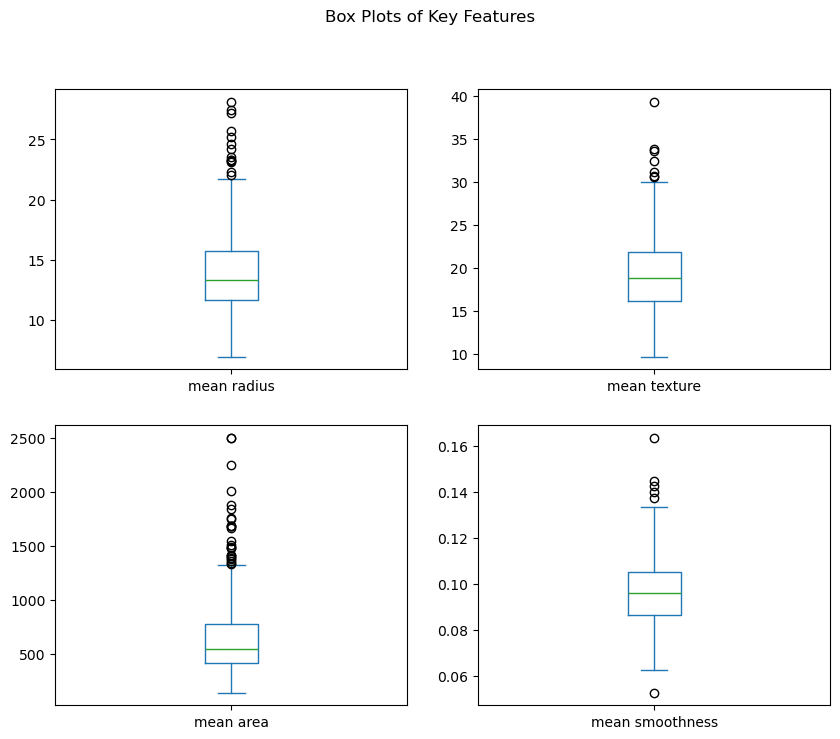

In [10]:
X[['mean radius', 'mean texture', 'mean area', 'mean smoothness']].plot(kind='box', subplots=True, layout=(2,2), figsize=(10,8), title='Box Plots of Key Features')

In [11]:
# ─── STEP 2: Prepare and Split Data ─────────────────────────────
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
 
# Stratify ensures class balance in both train and test sets
print(f"Training set: {len(X_train)} samples")
print(f"Test set:     {len(X_test)} samples")
 
# Feature scaling is critical for both Logistic Regression and KNN
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc  = scaler.transform(X_test)
 
# ─── STEP 3: Train Logistic Regression ──────────────────────────
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train_sc, y_train)
lr_pred  = lr_model.predict(X_test_sc)
lr_proba = lr_model.predict_proba(X_test_sc)[:, 1]  # malignancy probability
 
# Clinical metrics
lr_cm = confusion_matrix(y_test, lr_pred)
lr_tn, lr_fp, lr_fn, lr_tp = lr_cm.ravel()
 
print("=== Logistic Regression Results ===")
print(f"Sensitivity (Recall):   {lr_tp/(lr_tp+lr_fn):.3f}  "
      f"← % malignant tumors correctly identified")
print(f"Specificity:            {lr_tn/(lr_tn+lr_fp):.3f}  "
      f"← % benign tumors correctly cleared")
print(f"AUC-ROC Score:          {roc_auc_score(y_test, lr_proba):.3f}")
print(f"Overall Accuracy:       {accuracy_score(y_test, lr_pred):.3f}")


Training set: 455 samples
Test set:     114 samples
=== Logistic Regression Results ===
Sensitivity (Recall):   0.986  ← % malignant tumors correctly identified
Specificity:            0.976  ← % benign tumors correctly cleared
AUC-ROC Score:          0.995
Overall Accuracy:       0.982
